In [22]:
# library(scran)
library(ggplot2)
library(corrplot)
library(RColorBrewer)

corrplot 0.84 loaded


In [12]:
sce = readRDS("/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/DA_phenotype_wo_outliers2_sce.rds")
sce

In [ ]:
g <- buildSNNGraph(sce, k=30)
clust <- igraph::cluster_walktrap(g)$membership
table(clust)

In [4]:
file2 = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/mofa_logcounts_model_factors.csv"

In [5]:
df = read.csv(file2, row.names = 1)
head(df,2)

,MOFA1,MOFA2,MOFA3,MOFA4,MOFA5,MOFA6,MOFA7,MOFA8,MOFA9,MOFA10,MOFA11,MOFA12,MOFA13,MOFA14,MOFA15,MOFA16,MOFA17,MOFA18,MOFA19,MOFA20
HPSI0714i-iudw_1--DA--d30--0,1.666456,0.5892917,-1.2180321,0.5332707,-0.1147184,-0.7004497,-0.8720116,-0.7222332,0.1454206,0.2551732,-0.1537032,0.04656182,0.9335609,-0.3033329,-1.420607,0.3760455,-1.3750346,-1.321022,0.03628515,-0.5237842
HPSI0714i-iudw_1--DA--d30--1,1.793275,-1.0897083,0.5161943,0.3031652,-0.3707059,-0.6362975,1.1359303,0.2466621,-0.3232387,-0.3289503,0.2974980,0.10648809,1.4348016,0.1735013,1.149061,-0.5206075,0.8877376,-0.130147,0.94184241,0.6611521


In [17]:
### tSNE
set.seed(0)
library(Rtsne)
tsne = Rtsne(df)

df_tsne = data.frame(tsne$Y)
colnames(df_tsne) = c("tSNE1","tSNE2")
df_tsne$condition = sce$condition

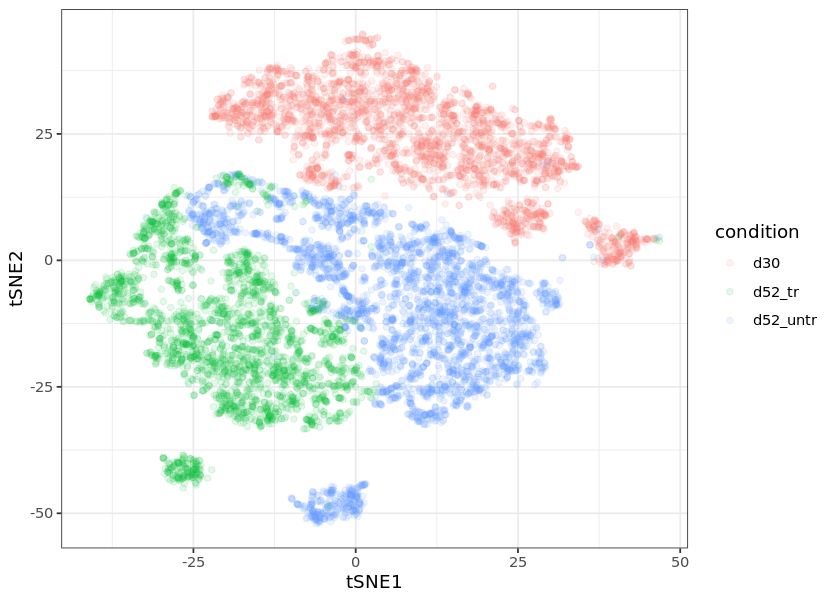

In [31]:
options(repr.plot.width = 7, repr.plot.height = 5)
p = ggplot(df_tsne, aes(x = tSNE1, y = tSNE2, col = condition)) + geom_point(alpha = 0.1) + theme_bw()
p

In [60]:
df_tsne$cluster = clust

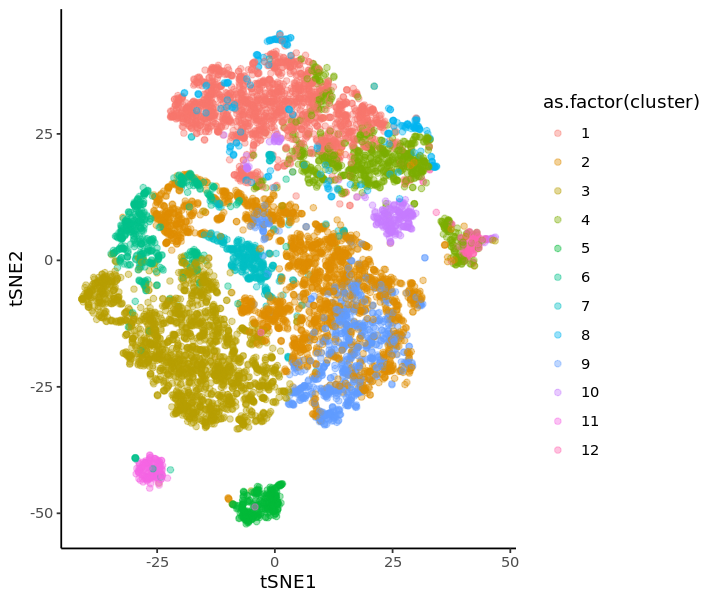

In [61]:
p = ggplot(df_tsne, aes(x = tSNE1, y = tSNE2, col = as.factor(cluster))) + geom_point(alpha = 0.4) + theme_bw()
p + theme_classic()

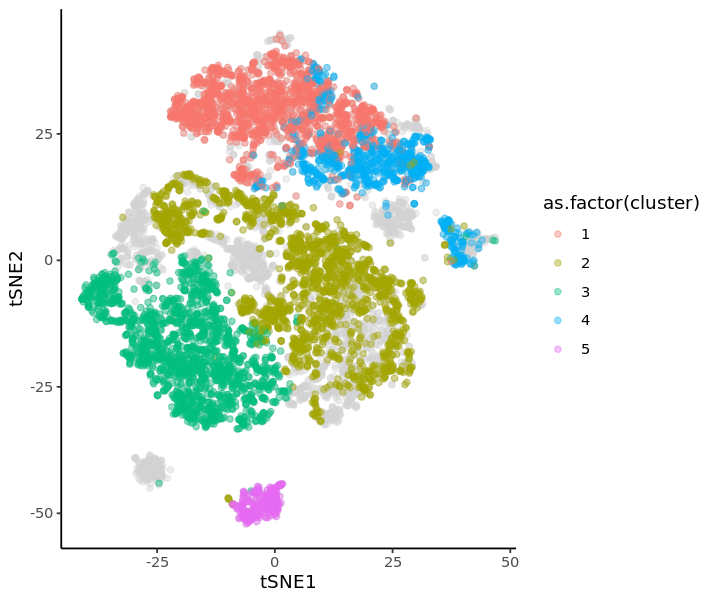

In [69]:
p = ggplot(df_tsne, aes(x = tSNE1, y = tSNE2)) + geom_point(col="lightgrey",alpha = 0.4) + theme_bw()
p + theme_classic() + geom_point(aes(x = tSNE1, y = tSNE2, col = as.factor(cluster)), 
                                 data = df_tsne[df_tsne$clust %in% c(1,2,3,4,5),], alpha =0.4)

In [13]:
# load cluster summaries
cluster_summaries = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/genetic_effect/scaled_absolute_eff_sizes_20mofas_as_spatial_downsample_50pct_cluster_summaries.csv", row.names=1)
colnames(cluster_summaries) = paste0("cluster",0:(ncol(cluster_summaries)-1))
head(cluster_summaries,2)

,cluster0,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,cluster7,cluster8,cluster9,cluster10
HPSI0114i-bezi_3--DA--d30--0,0.02749663,0.1611605,-0.5116629,0.8156274,-0.5794714,-0.6188704,-0.9539982,-0.3683003,0.3308779,-0.1661013,-0.5638771
HPSI0114i-bezi_3--DA--d30--1,-0.02166692,0.1732007,-0.6654886,0.9685108,-0.7649764,-0.7353459,-0.8667062,-0.3840769,0.2245438,-0.1468427,-0.6475393


In [7]:
nrow(df_tsne)

[1] 8352

In [8]:
nrow(cluster_summaries)
nrow(df_tsne)

[1] 8352

[1] 8352

In [9]:
df$cluster = clust
df0 = df[rownames(cluster_summaries),]
nrow(df0)

ERROR: Error in eval(expr, envir, enclos): object 'clust' not found


In [ ]:
head(df0,2)

In [ ]:
df1 = as.data.frame(model.matrix(~-1+as.factor(cluster), data = df0))
head(df1)

In [ ]:
df2 = cbind(cluster_summaries,df1)
corrplot(cor(df2))

In [18]:
rownames(df_tsne) = rownames(df)
df3 = df_tsne[rownames(cluster_summaries),]
nrow(df3)

[1] 8352

In [19]:
df4 = cbind(df3, cluster_summaries)
head(df4,2)

,tSNE1,tSNE2,condition,cluster0,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,cluster7,cluster8,cluster9,cluster10
HPSI0114i-bezi_3--DA--d30--0,23.64660,6.806569,d30,0.02749663,0.1611605,-0.5116629,0.8156274,-0.5794714,-0.6188704,-0.9539982,-0.3683003,0.3308779,-0.1661013,-0.5638771
HPSI0114i-bezi_3--DA--d30--1,23.14667,9.779284,d30,-0.02166692,0.1732007,-0.6654886,0.9685108,-0.7649764,-0.7353459,-0.8667062,-0.3840769,0.2245438,-0.1468427,-0.6475393


In [52]:
x=0.85
qt0 = quantile(df4$cluster0, probs = c(x))
qt1 = quantile(df4$cluster1, probs = c(x))
qt2 = quantile(df4$cluster2, probs = c(x))
qt3 = quantile(df4$cluster3, probs = c(x))
qt4 = quantile(df4$cluster4, probs = c(x))
qt5 = quantile(df4$cluster5, probs = c(x))
qt6 = quantile(df4$cluster6, probs = c(x))
qt7 = quantile(df4$cluster7, probs = c(x))
qt8 = quantile(df4$cluster8, probs = c(x))
qt9 = quantile(df4$cluster9, probs = c(x))
qt10 = quantile(df4$cluster10, probs = c(x))
qt11 = quantile(df4$cluster11, probs = c(x))
qt12 = quantile(df4$cluster12, probs = c(x))

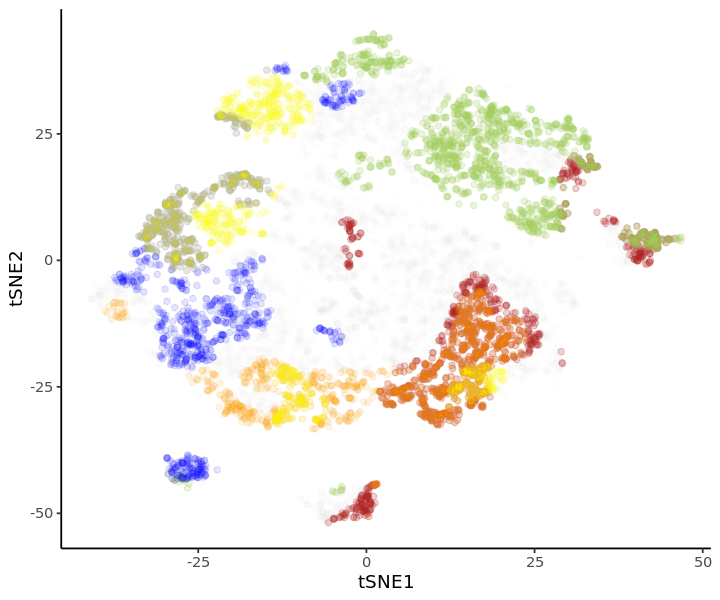

In [53]:
options(repr.plot.width = 6, repr.plot.height = 5)
p = ggplot(df4, aes(x = tSNE1, y = tSNE2)) + geom_point(col="grey",alpha = 0.01) + theme_bw()
p = p + geom_point(aes(x = tSNE1, y = tSNE2), alpha = 0.2, col='firebrick',data = df4[df4$cluster0 > as.numeric(qt0),]) 
# p = p + geom_point(aes(x = tSNE1, y = tSNE2), alpha = 0.2, col='orange',data = df4[df4$cluster1 > as.numeric(qt1),]) 
p = p + geom_point(aes(x = tSNE1, y = tSNE2), alpha = 0.1, col='orange',data = df4[df4$cluster2 > as.numeric(qt2),]) 
p = p + geom_point(aes(x = tSNE1, y = tSNE2), alpha = 0.2, col='darkolivegreen3',data = df4[df4$cluster3 > as.numeric(qt3),]) 
# p = p + geom_point(aes(x = tSNE1, y = tSNE2), alpha = 0.2, col='forestgreen',data = df4[df4$cluster4 > as.numeric(qt4),]) 
# p = p + geom_point(aes(x = tSNE1, y = tSNE2), alpha = 0.2, col='darkblue',data = df4[df4$cluster5 > as.numeric(qt5),]) 
# p = p + geom_point(aes(x = tSNE1, y = tSNE2), alpha = 0.1, col='cornflowerblue',data = df4[df4$cluster6 > as.numeric(qt6),]) 
# p = p + geom_point(aes(x = tSNE1, y = tSNE2), alpha = 0.1, col='darkorchid1',data = df4[df4$cluster7 > as.numeric(qt7),]) 
# p = p + geom_point(aes(x = tSNE1, y = tSNE2), alpha = 0.1, col='darkslategray2',data = df4[df4$cluster8 > as.numeric(qt8),]) 
p = p + geom_point(aes(x = tSNE1, y = tSNE2), alpha = 0.1, col='blue',data = df4[df4$cluster9 > as.numeric(qt9),]) 
p = p + geom_point(aes(x = tSNE1, y = tSNE2), alpha = 0.1, col='yellow',data = df4[df4$cluster10 > as.numeric(qt10),]) 
# p = p + geom_point(aes(x = tSNE1, y = tSNE2), alpha = 0.1, col='lightsalmon4',data = df4[df4$cluster11 > as.numeric(qt11),]) 
# p = p + geom_point(aes(x = tSNE1, y = tSNE2), alpha = 0.1, col='rosybrown4',data = df4[df4$cluster12 > as.numeric(qt12),]) 
p + theme_classic()

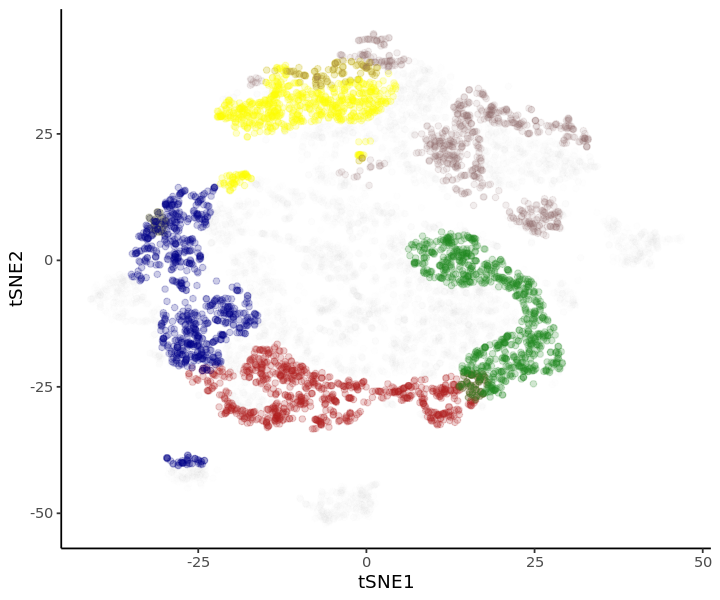

In [100]:
options(repr.plot.width = 6, repr.plot.height = 5)
p = ggplot(df4, aes(x = tSNE1, y = tSNE2)) + geom_point(col="grey",alpha = 0.01) + theme_bw()
p = p + geom_point(aes(x = tSNE1, y = tSNE2), alpha = 0.2, col='firebrick',data = df4[df4$cluster0 > as.numeric(qt0),]) 
# p = p + geom_point(aes(x = tSNE1, y = tSNE2), alpha = 0.2, col='orange',data = df4[df4$cluster1 > as.numeric(qt1),]) 
p = p + geom_point(aes(x = tSNE1, y = tSNE2), alpha = 0.2, col='yellow',data = df4[df4$cluster2 > as.numeric(qt2),]) 
# p = p + geom_point(aes(x = tSNE1, y = tSNE2), alpha = 0.2, col='darkolivegreen3',data = df4[df4$cluster3 > as.numeric(qt3),]) 
p = p + geom_point(aes(x = tSNE1, y = tSNE2), alpha = 0.2, col='forestgreen',data = df4[df4$cluster4 > as.numeric(qt4),]) 
p = p + geom_point(aes(x = tSNE1, y = tSNE2), alpha = 0.2, col='darkblue',data = df4[df4$cluster5 > as.numeric(qt5),]) 
# p = p + geom_point(aes(x = tSNE1, y = tSNE2), alpha = 0.1, col='cornflowerblue',data = df4[df4$cluster6 > as.numeric(qt6),]) 
# p = p + geom_point(aes(x = tSNE1, y = tSNE2), alpha = 0.1, col='darkorchid1',data = df4[df4$cluster7 > as.numeric(qt7),]) 
# p = p + geom_point(aes(x = tSNE1, y = tSNE2), alpha = 0.1, col='darkslategray2',data = df4[df4$cluster8 > as.numeric(qt8),]) 
# p = p + geom_point(aes(x = tSNE1, y = tSNE2), alpha = 0.1, col='khaki3',data = df4[df4$cluster9 > as.numeric(qt9),]) 
# p = p + geom_point(aes(x = tSNE1, y = tSNE2), alpha = 0.1, col='lightgoldenrod4',data = df4[df4$cluster10 > as.numeric(qt10),]) 
# p = p + geom_point(aes(x = tSNE1, y = tSNE2), alpha = 0.1, col='lightsalmon4',data = df4[df4$cluster11 > as.numeric(qt11),]) 
p = p + geom_point(aes(x = tSNE1, y = tSNE2), alpha = 0.1, col='rosybrown4',data = df4[df4$cluster12 > as.numeric(qt12),]) 
p + theme_classic()

In [45]:
counts(sce)[1:5,1:5]

,HPSI0714i-iudw_1--DA--d30--0,HPSI0714i-iudw_1--DA--d30--1,HPSI0714i-iudw_1--DA--d30--2,HPSI0714i-iudw_1--DA--d30--3,HPSI0714i-iudw_1--DA--d30--4
MIR1302.10,0,0,0,0,0
FAM138A,0,0,0,0,0
OR4F5,0,0,0,0,0
RP11.34P13.7,0,0,0,0,0
RP11.34P13.8,0,0,0,0,0


In [70]:
df = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/genetic_effect/MOFA10/eqtl_tot_genetic_effect_all.txt", sep="\t",row.names = 1)
head(df)

,ABHD10_.3_111697439_T_G,ABHD12B_.14_51328222_C_T,ACKR2_.3_42817129_C_T,ADD2_.2_70894426_A_T,ADSL_.22_40757228_A_C,AIM1L_.1_26673825_C_T,AKAP7_.6_131691964_C_A,ALDH7A1_.5_126011412_G_A,ANKRD18B_.9_33524775_C_A,APIP_.11_34905987_T_C,...,YWHAE_.17_1246420_G_A,ZBBX_.3_167080934_T_G,ZC3HAV1_.7_138730361_T_C,ZFR2_.19_3840157_C_T,ZG16B_.16_2871121_T_C,ZNF423_.16_49599995_C_G,ZNF552_.19_58315273_G_A,ZNF738_.19_21474173_G_A,ZNF77_.19_2936535_G_A,ZP3_.7_76177284_C_T
HPSI0714i-iudw_1--DA--d30--0,-0.2108622,0.003924475,0.02206444,0.02834211,0.22351628,-0.035750325,-0.09473256,0.006901295,0.0006737957,-0.07499119,...,0.06962421,0.11202526,-0.041721326,0.011268972,0.10575791,-0.03101814,0.0909417,0.3020245,-0.15838420,-0.05596878
HPSI0714i-iudw_1--DA--d30--1,-0.2283969,-0.047217741,0.10596178,0.02514689,-0.19218007,-0.014717675,0.01878961,-0.171038975,-0.1105473675,-0.18686595,...,-0.21070417,0.37598541,0.087746659,0.025059162,-0.19500546,-0.22780547,0.0775938,0.3452492,-0.34721520,-0.15259400
HPSI0714i-iudw_1--DA--d30--2,-0.3702669,-0.187986589,0.11071216,-0.08986937,0.09405019,0.006010368,0.27231100,0.068950760,-0.0703046436,-0.17930619,...,0.08333262,0.22613170,0.001520982,0.026842708,-0.06898036,-0.18245915,0.1397725,0.2769493,-0.41400755,-0.14625096
HPSI0714i-iudw_1--DA--d30--3,-0.4690041,0.016038409,0.08790047,0.05432180,-0.04301341,-0.052857589,-0.08388531,-0.114040987,-0.0567014573,-0.10449033,...,-0.03074405,0.36092094,0.022946283,0.005356103,-0.06347749,-0.07845885,0.0968855,0.3661641,-0.28384550,-0.22302969
HPSI0714i-iudw_1--DA--d30--4,0.3503564,-0.236613003,0.01487196,-0.12134894,0.07402790,0.053992532,-0.00519023,0.141903046,-0.0635561162,-0.03331474,...,-0.02967722,-0.08769147,-0.087631920,0.064195619,-0.07719302,-0.07379042,0.1435780,0.1828284,-0.03142945,0.31337013
HPSI0714i-iudw_1--DA--d30--5,0.1012829,-0.244239442,0.08520448,-0.14295098,0.05632833,0.042455114,0.20805332,0.097543017,-0.0595425781,-0.11520636,...,0.01510769,0.01728996,-0.061095574,0.068456202,-0.09436485,-0.19404150,0.1471580,0.1729609,-0.21927488,0.15319374


In [71]:
# build the sce object
sce1 <- SingleCellExperiment(
assays = list(counts = t(df), logcounts = t(df)))
sce1

class: SingleCellExperiment 
dim: 213 8352 
metadata(0):
assays(2): counts logcounts
rownames(213): ABHD10_.3_111697439_T_G ABHD12B_.14_51328222_C_T ...
  ZNF77_.19_2936535_G_A ZP3_.7_76177284_C_T
rowData names(0):
colnames(8352): HPSI0714i-iudw_1--DA--d30--0
  HPSI0714i-iudw_1--DA--d30--1 ... HPSI0114i-rozh_4--DA--d52_tr--11
  HPSI0114i-rozh_4--DA--d52_tr--12
colData names(0):
reducedDimNames(0):
spikeNames(0):
altExpNames(0):

In [72]:
g1 <- buildSNNGraph(sce1, k=30)
clust1 <- igraph::cluster_walktrap(g1)$membership
table(clust1)

clust1
   1    2    3    4    5    6    7    8    9 
1261 1949 1862 1687  251  227  356  610  149 

In [73]:
df3$cluster1 = clust1

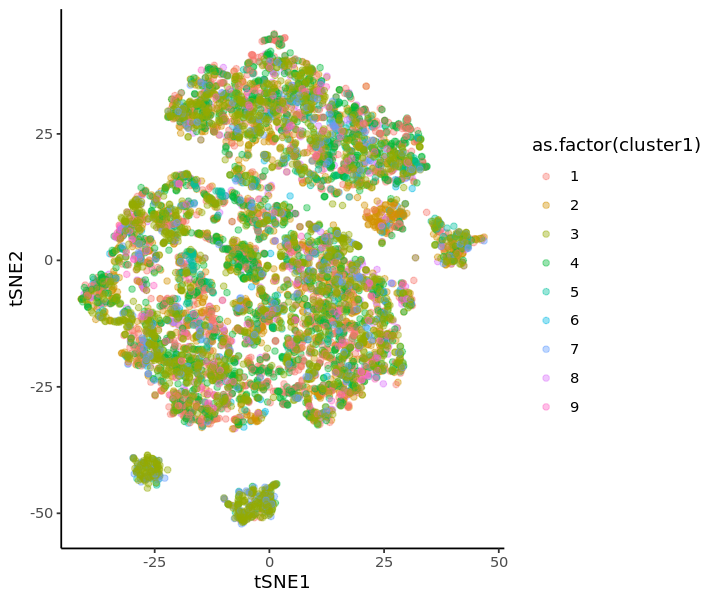

In [102]:
p = ggplot(df3, aes(x = tSNE1, y = tSNE2, col = as.factor(cluster1))) + geom_point(alpha = 0.4) + theme_bw()
p + theme_classic()

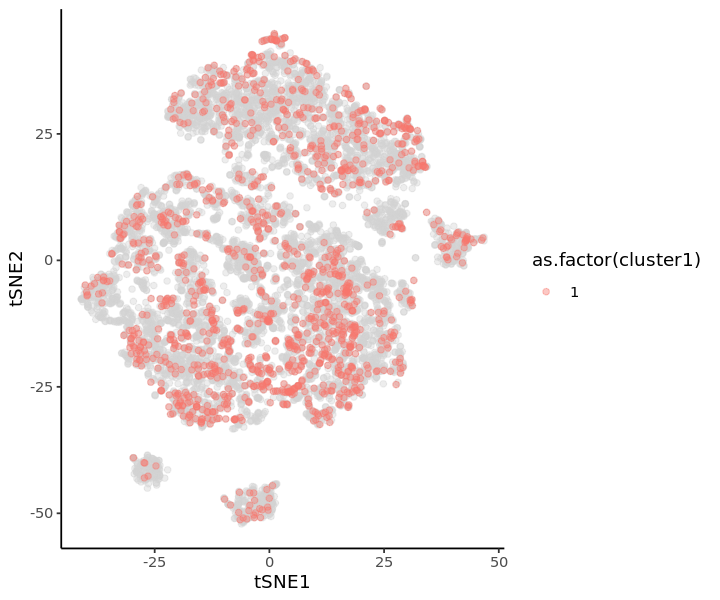

In [80]:
p = ggplot(df3, aes(x = tSNE1, y = tSNE2)) + geom_point(col="lightgrey",alpha = 0.4) + theme_bw()
p + theme_classic() + geom_point(aes(x = tSNE1, y = tSNE2, col = as.factor(cluster1)), 
                                 data = df3[df3$cluster1 %in% c(1),], alpha =0.4)